In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/survey lung cancer.csv')

In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# **Exploratory Data Analysis**

In [18]:
df.shape

(309, 16)

In [20]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [21]:
# Not Dropping because Data size is already too small
df.duplicated().sum()

33

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [4]:
df['GENDER'].unique()

array(['M', 'F'], dtype=object)

<Axes: ylabel='SMOKING'>

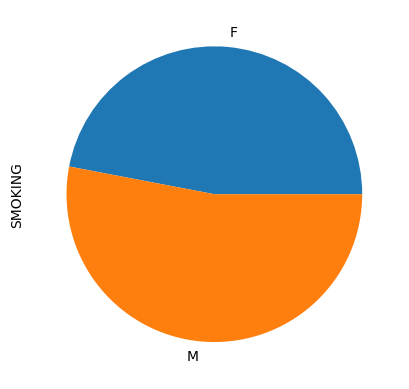

In [7]:
df.groupby('GENDER')['SMOKING'].sum().plot(kind='pie')

<Axes: ylabel='SMOKING'>

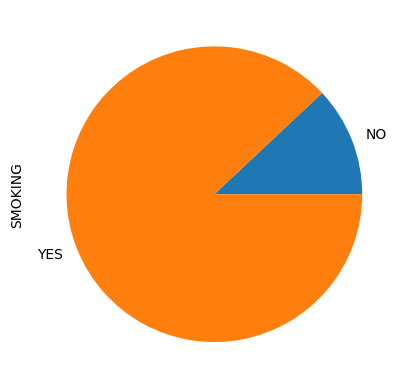

In [8]:
df.groupby('LUNG_CANCER')['SMOKING'].sum().plot(kind='pie')

In [10]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# **Splitting Data into Dependent and Independent Features**

In [11]:
X, y = df.drop('LUNG_CANCER', axis=1), df['LUNG_CANCER']

In [14]:
y = y.map({'YES' : 1, 'NO' : 0})

In [17]:
X

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2


# **Preprocessing Feature Engineering**

- Label Encode (GENDER)
- Scaling on all data 

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [40]:
# Splitting our data into Training and Testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
le_gender = LabelEncoder()

X_train['GENDER'] = le_gender.fit_transform(X_train['GENDER'])
X_test['GENDER'] = le_gender.transform(X_test['GENDER'])

In [45]:
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [47]:
X_train_trf.shape

(247, 15)

# **Building Our Models**

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

### **Evaluating Our Machine Learning Models**

In [56]:
np.mean(cross_val_score(RandomForestClassifier(), X_train, y_train, cv=5))

0.8867755102040815

In [57]:
np.mean(cross_val_score(LogisticRegression(), X_train, y_train, cv=5))

c:\Users\TALHA PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\TALHA PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

0.8990204081632653

In [62]:
np.mean(cross_val_score(SVC(kernel='rbf'), X_train, y_train, cv=5))

0.8502857142857142

# **Creating Our Neural Network Architecutre**
### because Machine Learning is not satisfying me

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [73]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_trf.shape[1], )),
    Dropout(0.2),

    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

c:\Users\TALHA PC\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
adam = Adam(learning_rate=0.001)
bcentropy = BinaryCrossentropy()

In [75]:
model.compile(optimizer=adam, loss=bcentropy, metrics=['accuracy'])

In [76]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,417 (48.50 KB)

 Trainable params: 12,417 (48.50 KB)

 Non-trainable params: 0 (0.00 B)

In [115]:
es_callback = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
tb_callback = TensorBoard(log_dir='logs/', histogram_freq=1)

In [116]:
history = model.fit(X_train_trf, y_train, validation_data=(X_test_trf, y_test), epochs=100, callbacks=[es_callback, tb_callback])

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9597 - loss: 0.1030 - val_accuracy: 0.9516 - val_loss: 0.1068
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9506 - loss: 0.1550 - val_accuracy: 0.9516 - val_loss: 0.1118
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9578 - loss: 0.1255 - val_accuracy: 0.9516 - val_loss: 0.1130
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9521 - loss: 0.1145 - val_accuracy: 0.9516 - val_loss: 0.1098
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9297 - loss: 0.1460 - val_accuracy: 0.9516 - val_loss: 0.1111
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9684 - loss: 0.1134 - val_accuracy: 0.9516 - val_loss: 0.1090
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9453 - loss: 0.1205 - val_accuracy: 0.9355 - val_loss: 0.1107
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9345 - loss: 0.1311 - val_accuracy: 0.9355 - val_loss:

In [121]:
y_train[15]

1

In [122]:
prediction = model.predict(X_train_trf[15].reshape(1, -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [123]:
if prediction[0][0] >= 0.5:
    print('Have Cancer')

else:
    print('No Cancer')

Have Cancer


In [125]:
%load_ext tensorboard
%tensorboard --logdir logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 12224), started 0:00:25 ago. (Use '!kill 12224' to kill it.)

In [126]:
import pickle

In [128]:
with open('models/le_gender.pkl', 'wb') as file:
    pickle.dump(le_gender, file)

with open('models/scaleing.pkl', 'wb') as file:
    pickle.dump(scaler, file)

model.save('models/ANN_Model.h5')

In [129]:
X_train.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')

In [130]:
dict = {
    'age' : 10,
    'year' : 2000,
    'height' : 120
}

In [137]:
scaler.get_feature_names_out()

array(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ',
       'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'], dtype=object)